In [1]:
#n_scenarios = 1 # Ideally a power of 2 > 1000 ... 2^10 = 1024
policies = pow(2,9) #512
pf_id = 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import Scenario

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id) #changes for each file

In [4]:
import copy
uncertainties = copy.deepcopy(dike_model.levers)
levers = copy.deepcopy(dike_model.levers)

In [5]:
scenarios = [Scenario('scenario 1', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66})]

In [6]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator, Samplers)
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=scenarios, policies=policies, lever_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1 scenarios * 32768 policies * 1 model(s) = 32768 experiments
100%|█████████████████████████████████| 32768/32768 [10:57:21<00:00,  1.20s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
experiments, outcomes = results

In [8]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Matvei_Open_Exploration_levers_id_%s.tar.gz' % pf_id)
experiments.to_csv('./output/open_exploration/Matvei_Open_Exploration_levers_id_%s_exp.csv' % pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Matvei_Open_Exploration_levers_id_%s_out.csv' % pf_id, index=False)

[MainProcess/INFO] results saved successfully to C:\Users\Матвей\Documents\GitHub\MBDM\final assignment\output\open_exploration\Matvei_Open_Exploration_levers_id_2.tar.gz


In [9]:
outcomes

{'Expected Annual Damage': array([     0.        ,      0.        ,      0.        , ...,
        257355.40337949, 257355.40337949, 257355.40337949]),
 'Dike Investment Costs': array([8.83347338e+08, 8.83347338e+08, 8.83347338e+08, ...,
        8.71663314e+08, 8.59594177e+08, 8.59594177e+08]),
 'RfR Investment Costs': array([9.4520e+08, 1.0298e+09, 1.0298e+09, ..., 1.0605e+09, 1.0605e+09,
        1.0605e+09]),
 'Evacuation Costs': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        22.49497828,  0.        ]),
 'Expected Number of Deaths': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.47735305e-04, 1.77282366e-05, 1.47735305e-04])}

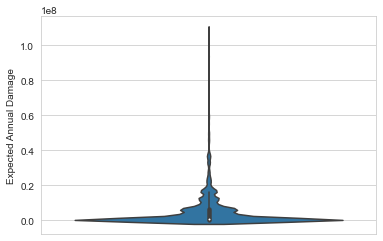

In [10]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='Expected Annual Damage')
plt.show()

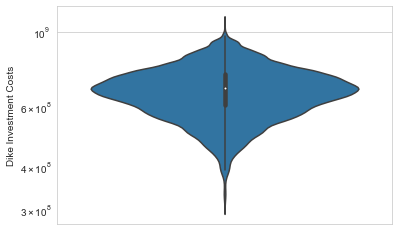

In [11]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Dike Investment Costs')
ax.set_yscale('log')
plt.show()

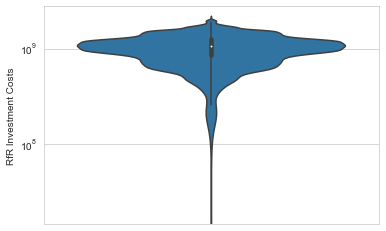

In [12]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Investment Costs')
ax.set_yscale('log')
plt.show()

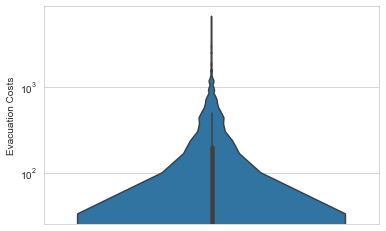

In [13]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Evacuation Costs')
ax.set_yscale('log')
plt.show()

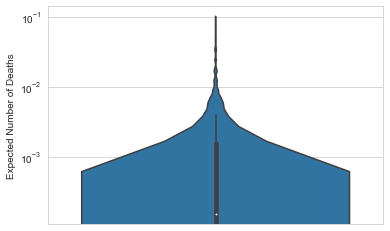

In [14]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Number of Deaths')
ax.set_yscale('log')
plt.show()